# Fraud Analysis

#### One of the biggest challenges companies who sell items online in any form go through is fraud analysis : detecting which user might be a fraud or using a fraud card for online transaction. This not only results in loss of revenue but even the person is often times hard to find/take legal actions against !

So one way to avoid it would be as is the golden saying : Prevention is better than cure.

Detecting fraudulent transactions through various personal attributes can help companies not only recognise fraud people but also protect their valuable assets from getting into their long hands, that is ofcourse dependant upon the business involved. 

But the major problem that one may face when developing a model of fraud detection is : The data is skewed ! What that means is, majority of the observations present as data belong to one class whereas only a few belong the the second. That's generally bad since I may end up developing a model that predicts a new entry as not fraud since let's say the data my model learnt from had 95% not fraud cases. In this case I would be getting a high accuracy in my model but well obviously I am not actually solving a problem.

#### In this particular case measure of accuracy is not the correct way of evaluation. But something like recall is !

#### Recall : True Positive / True Positive + False Negative

To understand why recall is useful in such a case, let's take an exmaple !

Recall in such a case is useful since recall is affected by False Negatives, the more the False negatives the less is my recall i.e. the more fraud cases I am recognising as not fraud, the lesser recall I will be getting hence giving an indication that the model can be improved upon.

#### The second thing we can do is resampling : having a dataset with approximately equal data points of both classes

We can perform 
1. Oversampling : Repeat the data points of the lesser number class to have equal data points of both classes
2. Undersampling : Remove the data points of majority class to have equal number of data of each class
3. SMOTE (Synthetic Minority Oversampling Technique) : Much like oversampling but instead of repeating data points we'll use an algorithm to generate similar data points of minority class.

NOTE : SMOTE represents advanced technique for performing over-sampling. There are other techniques as well for performing over-sampling and undersampling which you can look into. 

These are present in the imbalanced-learn package of python known as imblearn

In this notebook I'll be doing all the three !

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


So you can read about the data and what it represents though there is not much : https://www.kaggle.com/mlg-ulb/creditcardfraud

V1-V28 Represent a result of a PCA Dimensionality reduction to protect user identities and sensitive features. 
Amount represents the transaction amount.
Class 0 is for not fraud, 1 is for fraud !

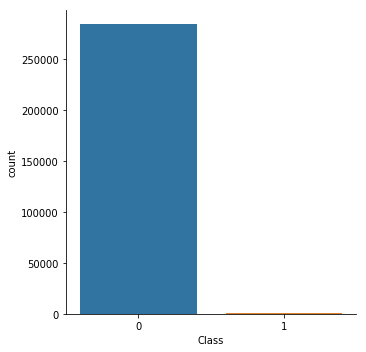

In [4]:
sns.catplot('Class',data=data,kind='count')

That's how much skewed the data is !

Before performing any kind of sampling let's see how a model will perform if we use this skewed data.

I'll use logistic regression in this notebook. You can however use various other models to make your prediction better, which currently is not my priority.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1:],test_size=0.2)

In [7]:
model1 = LogisticRegression()

In [8]:
model1.fit(x_train,y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred = model1.predict(x_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

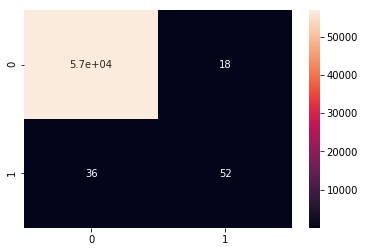

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.74      0.59      0.66        88

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



So for class 1, I am getting a recall value of 0.65 which is bad since I am predicting fraud cases as not fraud for getting a lower recall which ideally should not be !

In [13]:
from sklearn.metrics import recall_score

In [14]:
print(recall_score(y_test,y_pred))

0.5909090909090909


## 1. Oversampling

One very specific mistake which people make while oversampling, I know since I was making the same is, the oversample the data before splitting it into training and testing datasets. Why that is important is because imagine if I am oversampling before splitting the data, then what oversampling generally does is duplicate the rows of minority class in the dataset. So after I split the data, the same row might be present in both my training and testing dataset, making my model perform better on the test dataset when actually it is not so and shouldn't be since test data is something the model should never have seen.

In [15]:
data[data.Class==0].count()[0]

284315

In [16]:
data[data.Class==1].count()[0]

492

So we basically have 284315 rows of data belonging to NOT FRAUD and 492 rows of data belonging to FRAUD class

Let's perform some oversampling by repeating data points of lower number class

In [25]:
count0 = y_train[y_train['Class']==0].count()[0]
count1 = y_train[y_train['Class']==1].count()[0]

In [53]:
datanew = pd.concat([x_train,y_train],axis=1)

In [54]:
data0 = datanew[datanew.Class==0]
data1 = datanew[datanew.Class==1]

In [55]:
#create a dataframe with size equal to that of oversampled class
sample1 = data1.sample(count0,replace=True)
#concatenate both classes
data_over = pd.concat([data0,sample1],axis=0)

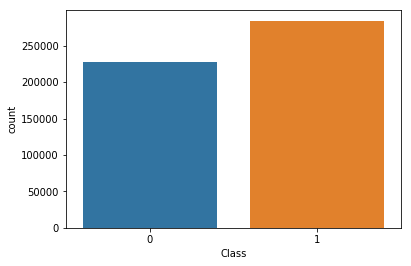

In [56]:
sns.countplot('Class',data=data_over)

Works like a charm !

Now let's perform the same task as we did above on our newly sampled data

In [64]:
x1_train,x1_test,y1_train,y1_test = train_test_split(data_over.iloc[:,:-1],data_over.iloc[:,-1:],test_size=0.2)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


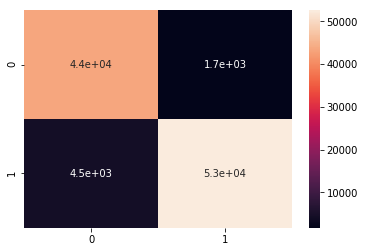

In [65]:
model2 = LogisticRegression()
model2.fit(x1_train,y1_train)
y1_pred = model2.predict(x1_test)
sns.heatmap(confusion_matrix(y1_test,y1_pred),annot=True)

Not easy to read at all but we can still see the precision and recall :

In [66]:
print(classification_report(y1_test,y1_pred))
print('Oversampling recall :',recall_score(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     45339
           1       0.97      0.92      0.94     57013

   micro avg       0.94      0.94      0.94    102352
   macro avg       0.94      0.94      0.94    102352
weighted avg       0.94      0.94      0.94    102352

Oversampling recall : 0.9215091294967814


As you can see though we are having a generally lower precision value, our recall has substantially inceased !

Now using the same model for our original data.

In [67]:
y_original_predict = model2.predict(x_test)

In [68]:
print(classification_report(y_test,y_original_predict))
print('Oversampling recall :',recall_score(y_test,y_original_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56874
           1       0.04      0.93      0.07        88

   micro avg       0.96      0.96      0.96     56962
   macro avg       0.52      0.95      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Oversampling recall : 0.9318181818181818


Definitely an improvement !!!!!!!!!!!

## 2. Undersampling 

In [34]:
count0 = data[data.Class==0].count()[0]
count1 = data[data.Class==1].count()[0]

In [35]:
data0 = data[data.Class==0]
data1 = data[data.Class==1]

In [36]:
#create a dataframe with size equal to that of undersampled class
sample0 = data0.sample(count1)
#concatenate both classes
data_under = pd.concat([data1,sample0],axis=0)

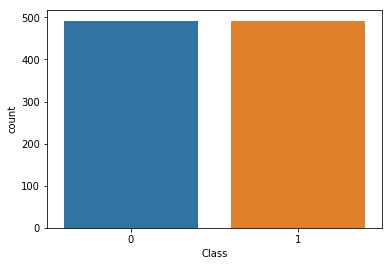

In [37]:
sns.countplot(data_under.Class)

In [38]:
x2_train,x2_test,y2_train,y2_test = train_test_split(data_under.iloc[:,:-1],data_under.iloc[:,-1:],test_size=0.2)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


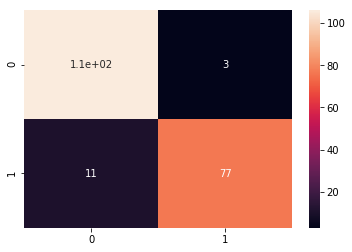

In [39]:
model3 = LogisticRegression()
model3.fit(x2_train,y2_train)
y2_pred = model3.predict(x2_test)
sns.heatmap(confusion_matrix(y2_test,y2_pred),annot=True)

In [40]:
print(classification_report(y2_test,y2_pred))
print('Undersampling recall :',recall_score(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       109
           1       0.96      0.88      0.92        88

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197

Undersampling recall : 0.875


Pretty good as well

In [41]:
y_original_predict = model3.predict(x_test)

In [42]:
print(classification_report(y_test,y_original_predict))
print('Undersampling recall :',recall_score(y_test,y_original_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56874
           1       0.04      0.92      0.08        88

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Undersampling recall : 0.9204545454545454


## 3. SMOTE

As I said above, SMOTE is one of the techniques used to perform over-sampling without repeatition of undersampled data. It does so by finding out the k-nearest neighbors to the undersampled data point, drawing a line between them and making the mid point as a new data point of the minority class. 

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(sampling_strategy='minority')

Keep in mind during oversampling always, always, always divide the data first and then perform oversampling to demote data bleeding into test.

In [45]:
sm = SMOTE(random_state=0, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


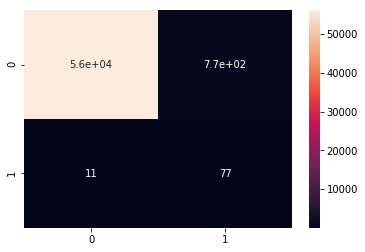

In [46]:
model4 = LogisticRegression()
model4.fit(x_train_res, y_train_res)
y3_pred = model4.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y3_pred),annot=True)

In [50]:
print(classification_report(y_test,y3_pred))
print('SMOTE recall :',recall_score(y_test,y3_pred))
print('SMOTE accuracy :',model4.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56874
           1       0.09      0.88      0.16        88

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.99      0.99     56962

SMOTE recall : 0.875
SMOTE accuracy : 0.98628910501738
